Complete the exercises below For **Assignment #5**.

In this exercise, we are building a logistic regression classification model. We'll work with the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  

Load the `tidymodels` library. 

In [45]:
library(tidymodels)



The data is located in your homework directory in the `diabetes.csv` file. Read in the data by running the following cell. We are "splitting" the data into training and testing sets. We will evaluate our model's performance with the test set.

In [55]:
diabetes = readr::read_csv('diabetes.csv') |> mutate(Outcome = factor(Outcome))

split = initial_split(diabetes, strata = Outcome)

diabetes_train = training(split)
diabetes_test = testing(split)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Glimpse the `diabetes_train` table.

In [47]:
glimpse(diabetes_train)



Rows: 576
Columns: 9
$ Pregnancies              <dbl> 1, 1, 5, 10, 1, 3, 8, 1, 5, 3, 6, 10, 4, 11, …
$ Glucose                  <dbl> 85, 89, 116, 115, 103, 126, 99, 97, 109, 88, …
$ BloodPressure            <dbl> 66, 66, 74, 0, 30, 88, 84, 66, 75, 58, 92, 78…
$ SkinThickness            <dbl> 29, 23, 0, 0, 38, 41, 0, 15, 26, 11, 0, 31, 3…
$ Insulin                  <dbl> 0, 94, 0, 0, 83, 235, 0, 140, 0, 54, 0, 0, 19…
$ BMI                      <dbl> 26.6, 28.1, 25.6, 35.3, 43.3, 39.3, 35.4, 23.…
$ DiabetesPedigreeFunction <dbl> 0.351, 0.167, 0.201, 0.134, 0.183, 0.704, 0.3…
$ Age                      <dbl> 31, 21, 30, 29, 33, 27, 50, 22, 60, 22, 28, 4…
$ Outcome                  <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


❓ Which variable is suitable as the "outcome" in a logistic regression model?

**Answer:**

Outcome

❓ Navigate to [Kaggle page](https://www.kaggle.com/datasets/mathchi/diabetes-data-set) for this dataset. Find descriptions for the `Glucose` and `BMI` columns. Add these descriptions to the [Markdown table](https://www.markdownguide.org/extended-syntax/#tables) below.

| Column name | Description |
| :---------- | :---------- |
| Glucose     |    Plasma glucose concentration a 2 hours in an oral glucose tolerance test         |
| BMI         |       Body mass index (weight in kg/(height in m)^2)      |

Make a bar chart showing the frequency of each "outcome" in the `Outcome` column from your `diabetes_train` data.

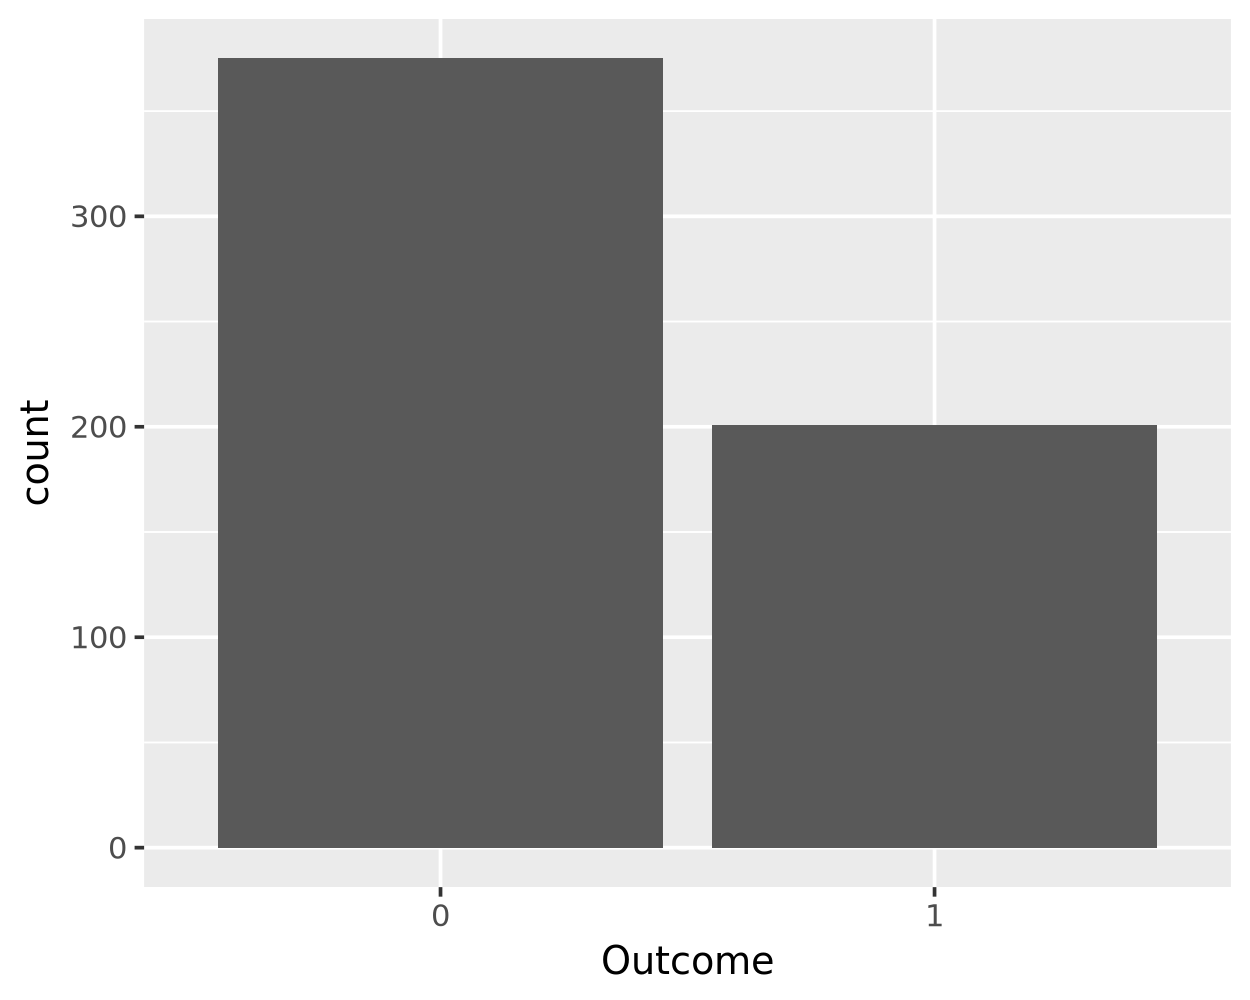

In [48]:
ggplot(diabetes_train, aes(Outcome)) + geom_bar()

❓ Is the data balanced? I.e. do we have equal counts of each outcome?

**Answer:**

No, the majority of the sample is non-diabetic.

Run the code below to create a table for plotting the predictors we will use in our model: `Glucose` and `BMI`. 

In [49]:
plot_df = diabetes_train |>
    select(Outcome, Glucose, BMI) |>
    pivot_longer(cols = c(Glucose, BMI))

plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,85.0
0,BMI,26.6
0,Glucose,89.0
0,BMI,28.1
0,Glucose,116.0
0,BMI,25.6


Using `plot_df`, make a chart showing the relationship of `Glucose` and `BMI` with `Outcome`. 

- use `geom_jitter` for your "geom"
- `facet_wrap` your chart by the `name` variable. (e.g. `facet_wrap(~name, ncol = 2, scales = 'free_x')`)

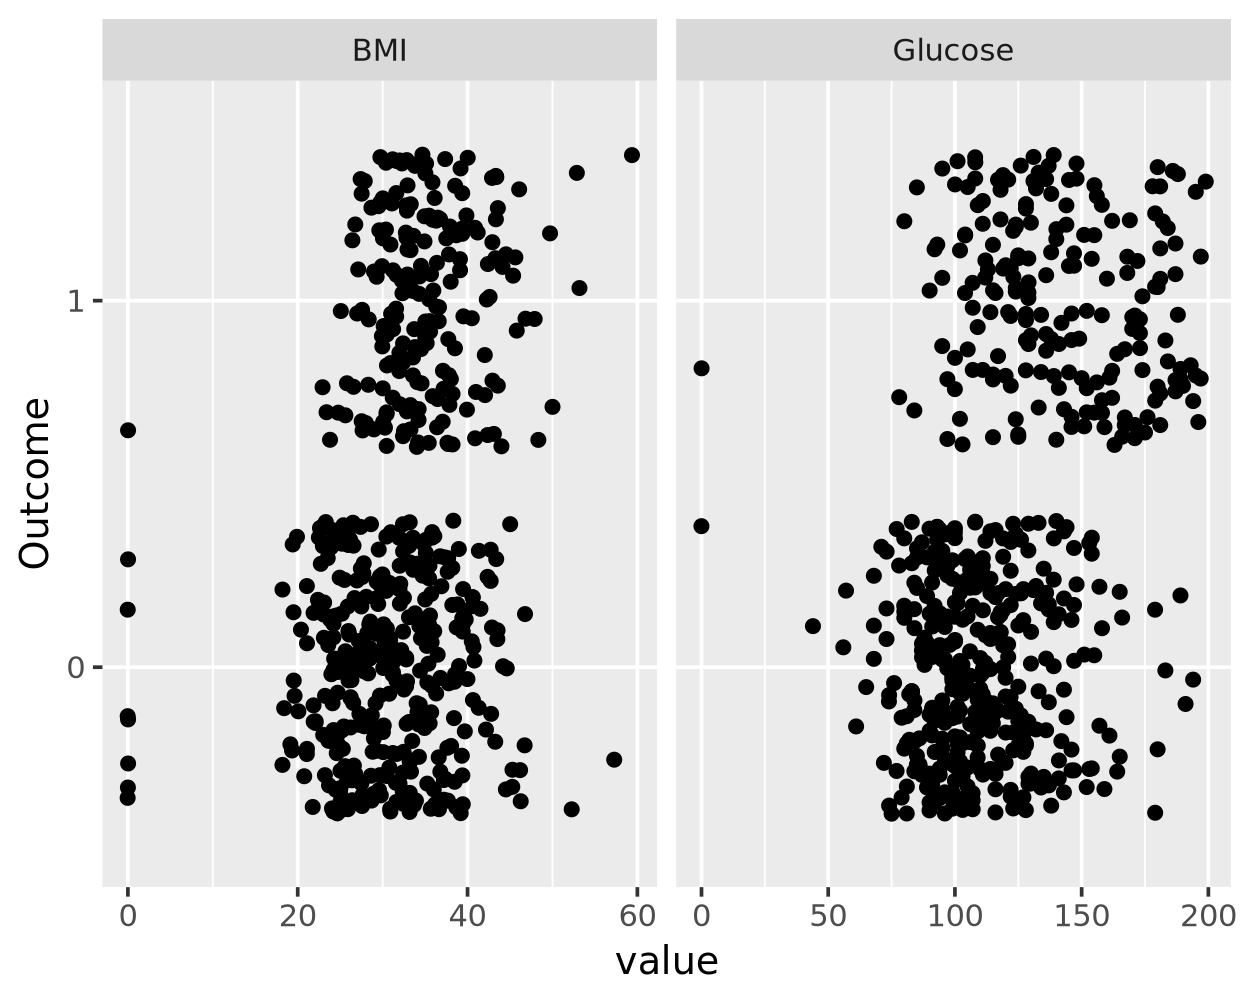

In [50]:
ggplot(plot_df, aes(value, Outcome)) + geom_jitter() + facet_wrap(~name, ncol=2, scales= 'free_x')

❓ What happens when you remove the `scales = 'free_x'` argument from the `facet_wrap` function?

Both graphs have the same scale, making it much more difficult to see the variation in BMI.

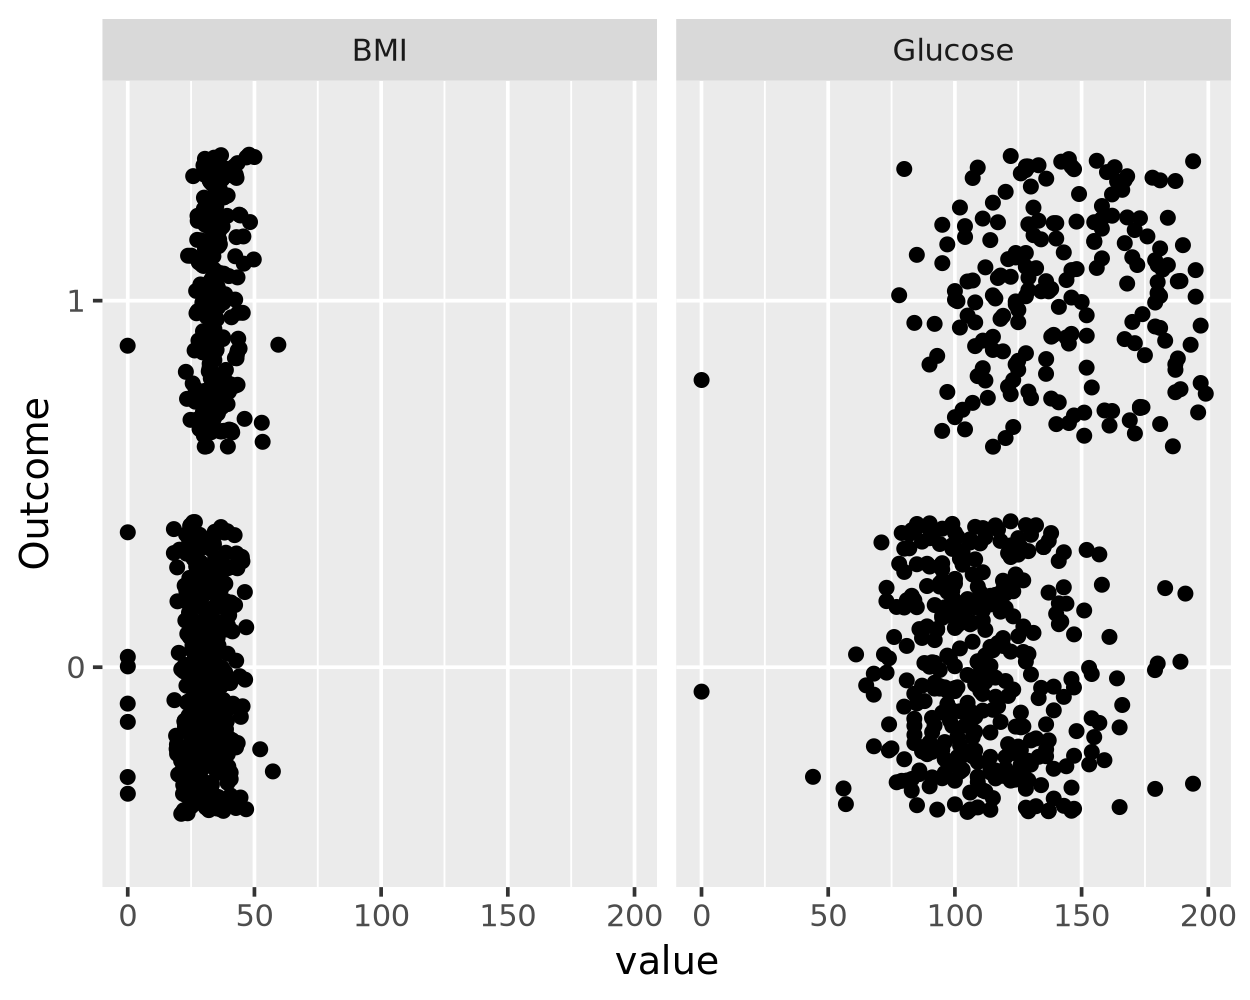

In [51]:
ggplot(plot_df, aes(value, Outcome)) + geom_jitter() + facet_wrap(~name, ncol=2)

Using your training data, build logistic regression model of `Outcome` with `BMI` and `Glucose` as predictors. 
- Use "glm" for you engine
- The formula for your fit function will be `Outcome ~ BMI + Glucose`

In [52]:
f <- glm(Outcome ~ BMI + Glucose, data=diabetes_train, family=binomial)
summary(f)


Call:
glm(formula = Outcome ~ BMI + Glucose, family = binomial, data = diabetes_train)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -7.750983   0.722832 -10.723  < 2e-16 ***
BMI          0.077126   0.016171   4.769 1.85e-06 ***
Glucose      0.036949   0.003921   9.424  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 745.11  on 575  degrees of freedom
Residual deviance: 573.96  on 573  degrees of freedom
AIC: 579.96

Number of Fisher Scoring iterations: 4


Using `augment` with your fitted model and the `diabetes_test` data as arguments, create a new dataset called `diabetes_test_wPred` that is the `diabetes_test` table including predictions from your model. 

In [66]:
f2 <- glm(Outcome ~ BMI + Glucose, data=diabetes_test, family=binomial)
diabetes_test_wPred <- augment(f2, diabetes_test)
diabetes_test_wPred

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,.fitted,.resid,.hat,.sigma,.cooksd,.std.resid
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10,115,0,0,0,35.3,0.134,29,0,-0.7954083,-0.86316448,0.010555131,0.9481413,1.622250e-03,-0.86775627
4,110,92,0,0,37.6,0.191,30,0,-0.8264066,-0.85204258,0.015351839,0.9481853,2.309794e-03,-0.85865907
1,115,70,30,96,34.6,0.529,32,1,-0.8681623,1.56116847,0.009650662,0.9433381,7.814427e-03,1.56875660
11,143,94,33,146,36.6,0.254,51,1,0.8519697,0.84294208,0.018096204,0.9482236,2.668840e-03,0.85067421
10,125,70,26,115,31.1,0.205,41,1,-0.6918381,1.48171506,0.008557244,0.9440330,5.796140e-03,1.48809574
7,147,76,0,0,39.4,0.257,43,1,1.3590233,0.67625082,0.022406362,0.9489409,2.007784e-03,0.68395672
13,145,82,19,110,22.2,0.245,57,0,-0.5366647,-0.95957494,0.036058031,0.9475738,7.563250e-03,-0.97735750
6,92,92,0,0,19.9,0.188,28,0,-3.6382123,-0.22785713,0.007925167,0.9501046,7.058993e-05,-0.22876543
3,180,64,25,70,34.0,0.271,26,0,2.5800889,-2.30352904,0.017972873,0.9350058,8.199128e-02,-2.32451284


Run the code below to generate a confusion matrix for your model predictions. 

(❗️Hint: See Table 4.4 from [*Introduction to Statistical Learning (Version 2)*](https://www.statlearning.com/) for an example confusion matrix.)

In [70]:
diabetes_test_wPred$.pred_class <- as.factor(ifelse(diabetes_test_wPred$.fitted >= 0.5, 1, 0))

diabetes_test_wPred |> conf_mat(Outcome, .pred_class)

          Truth
Prediction   0   1
         0 119  33
         1   6  34

❓ Based on the confusion matrix above, 
- How many individuals had diabetes in your test data?
- Of those that actually had diabetes, how many were predicted to have diabetes by your model?
- How many individuals predicted to have diabetes did not have diabetes?

67 individuals had diabetes in my test data
34 of these 67 were predicted to have diabetes
6 of those predicted to have diabetes did not have diabetes